In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
data = pd.read_csv('gt.txt',sep=';',names=['path','left','top','right','bottom','id'])
data.head()

,path,left,top,right,bottom,id
0,00000.ppm,774,411,815,446,11
1,00001.ppm,983,388,1024,432,40
2,00001.ppm,386,494,442,552,38
3,00001.ppm,973,335,1031,390,13
4,00002.ppm,892,476,1006,592,39


In [18]:
data.shape

(852, 6)

(800, 1360, 3)


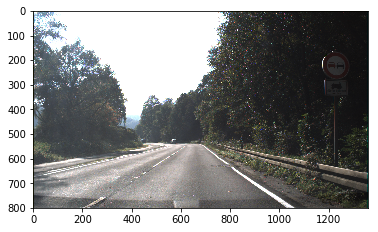

In [19]:
from PIL import Image
img = Image.open("TrainIJCNN2013/"+data['path'][10])
plt.imshow(img)
img=np.array(img)
print(img.shape)

In [20]:
unique, counts = np.unique(data["id"], return_counts=True)

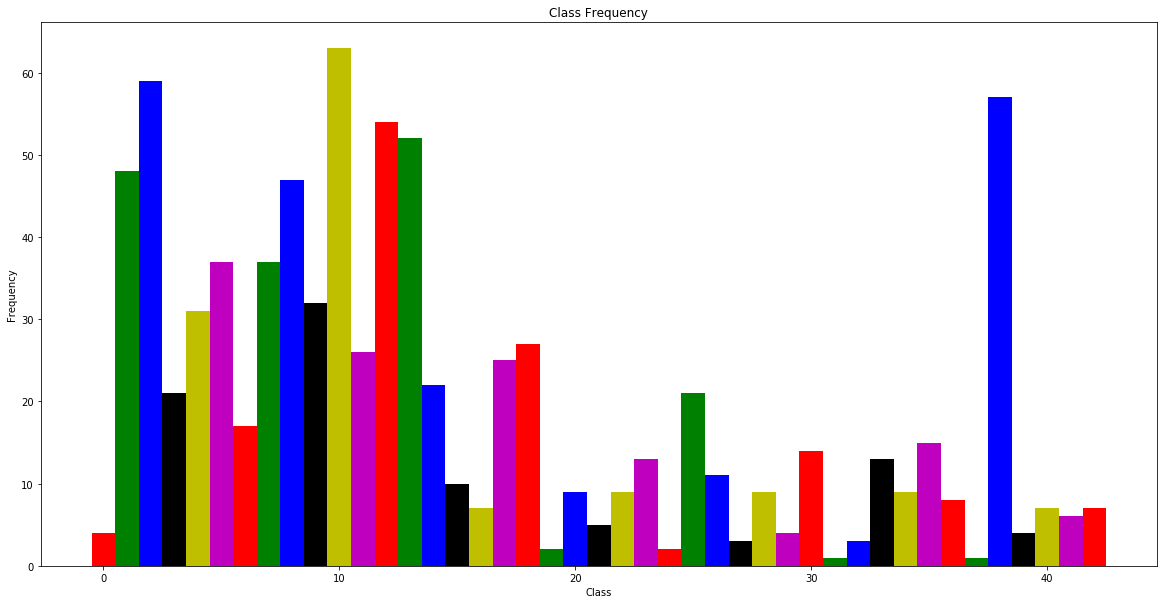

In [21]:
plt.figure(figsize=(20,10))
plt.bar(unique, counts, 1,color = list('rgbkym'))
plt.title('Class Frequency')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

<h1>obervation</h1>
1.the class id 1,2,10,12,13,38 present high in number where as 0,19,24,27,31,37 are fewer in number.

(array([311., 205.,  99.,  63.,  44.,  29.,  18.,  21.,   7.,   9.,   7.,
          5.,   2.,   5.,   4.,   5.,   4.,   3.,   5.,   6.]),
 array([  256.  ,   999.65,  1743.3 ,  2486.95,  3230.6 ,  3974.25,
         4717.9 ,  5461.55,  6205.2 ,  6948.85,  7692.5 ,  8436.15,
         9179.8 ,  9923.45, 10667.1 , 11410.75, 12154.4 , 12898.05,
        13641.7 , 14385.35, 15129.  ]),
 <a list of 20 Patch objects>)

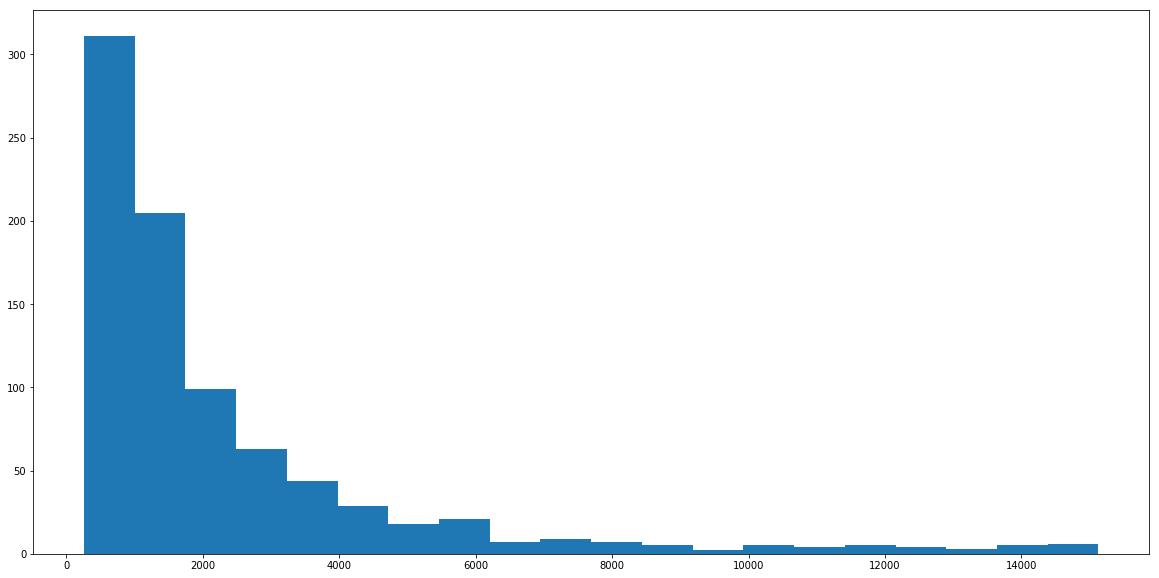

In [9]:
bounding_box_size=[]
for i in range(len(data)):
    temp_bounding = (data['bottom'][i]-data['top'][i])*(data['right'][i]-data['left'][i])
    bounding_box_size.append(temp_bounding)
plt.figure(figsize=(20,10))
plt.hist(bounding_box_size, bins=20)

<h1>obervation</h1>
1.most of the bounding box size ranges form 256 to 3974<br>
2.the range of bounding box size ranges from 256 to 15129

In [22]:
prohibitory = [0,1,2,3,4,5,7,8,9,10,15,16]
danger = [11,18,19,20,21,22,23,24,25,26,27,28,29,30,31]
mandatory = [33,34,35,36,37,38,39,40]
other = [6,12,13,14,17,32,41,42]

data ['Object Name'] = data['id']
for i in range(len(data['id'])):
    if(data['id'][i] in prohibitory):
        data['id'].loc[i]=0
        data['Object Name'].loc[i]='prohibitory'
    elif(data['id'][i] in danger):
        data['id'].loc[i]=1
        data['Object Name'].loc[i]='danger'
    elif(data['id'][i] in mandatory):
        data['id'].loc[i]=2
        data['Object Name'].loc[i]='mandatory'
    elif(data['id'][i] in other):
        data['id'].loc[i]=3
        data['Object Name'].loc[i]='other'
    else:
        data['id'].loc[i]=-1

C:\Users\ASUS\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [12]:
unique, counts = np.unique(data["Object Name"], return_counts=True)

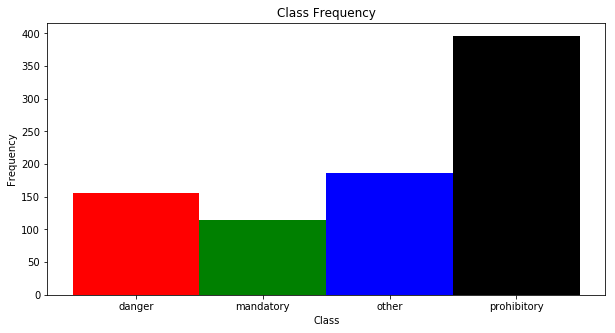

In [14]:
plt.figure(figsize=(10,5))
plt.bar(unique, counts, 1,color = list('rgbk'))
plt.title('Class Frequency')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

In [15]:
data.head()

,path,left,top,right,bottom,id,Object Name
0,00000.ppm,774,411,815,446,1,danger
1,00001.ppm,983,388,1024,432,2,mandatory
2,00001.ppm,386,494,442,552,2,mandatory
3,00001.ppm,973,335,1031,390,3,other
4,00002.ppm,892,476,1006,592,2,mandatory


In [23]:
#converting ppm to jpg
import os
import cv2
path_dir="TrainIJCNN2013/"
final_df=pd.DataFrame(columns=data.columns)
for current_dir, dirs, files in os.walk(path_dir):
    for f in files:
        if f.endswith('.ppm'):
            image_name=f[:-4]
            img=cv2.imread(path_dir + f)
            temp = data.loc[data['path'] == f].copy()
            if temp.isnull().values.all():
                os.remove(path_dir + '/' + f)
            else:
                final_df=final_df.append(temp)
                save_path = '/content/images' + '/' + image_name + '.jpg'
                cv2.imwrite(save_path, img)
final_df = final_df[~final_df.index.duplicated(keep='first')]
final_df.sort_index(inplace=True)

In [24]:
final_df

,path,left,top,right,bottom,id,Object Name
0,00000.ppm,774,411,815,446,1,danger
1,00001.ppm,983,388,1024,432,2,mandatory
2,00001.ppm,386,494,442,552,2,mandatory
3,00001.ppm,973,335,1031,390,3,other
4,00002.ppm,892,476,1006,592,2,mandatory
...,...,...,...,...,...,...,...
847,00570.ppm,881,416,914,449,0,prohibitory
848,00571.ppm,1287,361,1308,384,3,other
849,00575.ppm,403,474,435,506,2,mandatory
850,00593.ppm,584,510,608,534,2,mandatory


In [35]:
for i in range(len(final_df)):
    final_df['path'][i] = final_df['path'][i][:-4]+".jpg"

In [40]:
def draw_bb(img,bbox,txt):
    for i in range(len(bbox)):
        img = cv2.rectangle(img,(bbox[i][0], bbox[i][1]), (bbox[i][2], bbox[i][3]), (255,0,0), 2)   
        img = cv2.putText(img,txt[i],(bbox[i][0], bbox[i][1])
            , cv2.LINE_AA, 1, (0, 0, 255), 2)
    return img

In [42]:
#code to draw boundind box in the training image
j=0
temp=[]
txt=[]
for i in range(852):
    img =cv2.imread("TrainIJCNN2013/"+data['path'][j])
    if  final_df.path[i]!=final_df.path[i+1]:
        temp.append( final_df.loc[i][1:5])
        txt.append(final_df.loc[i][6])
        img = draw_bb(img, temp,txt)
        cv2.imwrite("annoted_images/"+final_df.loc[i][0], img)
        j=j+1
        temp=[]
        txt=[]
        print("yes")
    else:
        temp.append(final_df.loc[i][1:5])
        txt.append(final_df.loc[i][6])

yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes


KeyError: 852

In [ ]:
#dataframe to xml file
#https://gist.github.com/goodhamgupta/7ca514458d24af980669b8b1c8bcdafd
import os
import xml.etree.cElementTree as ET
from PIL import Image

ANNOTATIONS_DIR_PREFIX = "images"

DESTINATION_DIR = "XML"

CLASS_MAPPING = {
    '0': 'prohibitory',
    '1': 'danger',
    '2': 'mandatory',
    '3': 'other'
}

def create_root(filename, width, height):
    root = ET.Element("annotation")
    ET.SubElement(root, "folder").text = "images"
    ET.SubElement(root, "filename").text = (filename)
    ET.SubElement(root, "path").text = "images/{}".format(filename)
    source = ET.SubElement(root, "source")
    ET.SubElement(source, "database").text = "Unknown"
    size = ET.SubElement(root, "size")
    ET.SubElement(size, "width").text = str(width)
    ET.SubElement(size, "height").text = str(height)
    ET.SubElement(size, "depth").text = "3"
    ET.SubElement(root, "segmented").text = "0"
    return root

def create_object_annotation(root, voc):
    for ind,voc_label in voc.iterrows():
        obj = ET.SubElement(root, "object")
        ET.SubElement(obj, "name").text=str(CLASS_MAPPING.get(str(voc_label["id"])))
        ET.SubElement(obj, "pose").text = "Unspecified"
        ET.SubElement(obj, "truncated").text = str(0)
        ET.SubElement(obj, "difficult").text = str(0)
        bbox = ET.SubElement(obj, "bndbox")
        ET.SubElement(bbox, "xmin").text = str(voc_label["left"])
        ET.SubElement(bbox, "ymin").text = str(voc_label["top"])
        ET.SubElement(bbox, "xmax").text = str(voc_label["right"])
        ET.SubElement(bbox, "ymax").text = str(voc_label["bottom"])
    if(len(voc)==0):
      print('no')
    return root


def create_file(filename, width, height, voc):
    root = create_root(filename, width, height)
    root = create_object_annotation(root, voc)
    tree = ET.ElementTree(root)
    tree.write("{}/{}.xml".format(DESTINATION_DIR, filename[:-4]))


def read_file(filename):
    img = cv2.imread("{}/{}".format("images/", filename))
    w,h=img.shape[:2]
    voc = final_df.loc[final_df.path == filename].copy()
    voc["name"] = CLASS_MAPPING.get(str((voc["id"])))
    create_file(filename, w, h, voc)


def start():
    if not os.path.exists(DESTINATION_DIR):
        os.makedirs(DESTINATION_DIR)
    for filename in os.listdir(ANNOTATIONS_DIR_PREFIX):
          if filename.endswith(".jpg"):
            read_file(filename)
      


if __name__ == "__main__":
    start()